<a href="https://colab.research.google.com/github/sudhathangaraj99/KMeans-Clustering-Project/blob/main/KMEANS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-MEANS CLUSTERING**

In [1]:
#import libraries
import numpy as np #calculation
import matplotlib.pyplot as plt #graphs
from sklearn.datasets import make_blobs #synthetic dataset generation


**1. Data Generation**
       

*   We generate 500 data points with 3 centers (clusters).
Each point has 2 features, so it can be plotted in 2D.


In [2]:
X, y_true = make_blobs(
    n_samples=500,
    centers=3,
    n_features=2,
    cluster_std=0.75,
    random_state=42
)

**2. K-Means++ Initialization**

*   Pick first centroid randomly
*   Pick remaining centroids based on distance probability



In [3]:
def kmeans_plus_plus_init(X, k):
    """
    Initializes centroids using K-Means++ method.
    """
    n_samples = X.shape[0]
    centroids = []

    # first centroid chosen randomly
    first_idx = np.random.randint(0, n_samples)
    centroids.append(X[first_idx])

    # remaining centroids
    for _ in range(1, k):
        dist_sq = np.array([min(np.sum((x - c) ** 2) for c in centroids) for x in X])

        prob = dist_sq / np.sum(dist_sq)
        cum_prob = np.cumsum(prob)

        r = np.random.rand()
        next_idx = np.searchsorted(cum_prob, r)

        centroids.append(X[next_idx])

    return np.array(centroids)



**3.K-Means clustering from scratch**

*   Assignment Step

         Each point is assigned to the nearest centroid using Euclidean distance.
*   Update Step

         For each cluster, compute the mean of its points and update centroid
*   Stopping Condition

         Stop when centroids stop changing.



In [4]:
def kmeans_scratch(X, k, max_iters=100):
    """
    K-Means algorithm implemented using NumPy only.
    """
    centroids = kmeans_plus_plus_init(X, k)

    for _ in range(max_iters):
        # assign each point to nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # update centroids
        new_centroids = np.zeros_like(centroids)

        for i in range(k):
            cluster_points = X[labels == i]

            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                # handle empty cluster case
                new_centroids[i] = X[np.random.randint(0, X.shape[0])]

        # stopping condition
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


**4. WSS Calculation(Elbow Method)**

In [5]:
def calculate_wss(X, labels, centroids):
    """
    Computes Within-Cluster Sum of Squares (WSS).
    """
    wss = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        wss += np.sum((cluster_points - centroids[i]) ** 2)
    return wss


**5. Silhouette Score Calculation**

*   WSS measures how compact the clusters are.



In [6]:
def silhouette_score_scratch(X, labels, k):
    """
    Computes silhouette score without using sklearn.
    """
    n = len(X)
    silhouette_values = []

    for i in range(n):
        same_cluster = X[labels == labels[i]]

        # average distance within same cluster
        if len(same_cluster) > 1:
            a = np.mean(np.linalg.norm(same_cluster - X[i], axis=1))
        else:
            a = 0

        # minimum average distance to other clusters
        b = float("inf")
        for j in range(k):
            if j != labels[i]:
                other_cluster = X[labels == j]
                if len(other_cluster) > 0:
                    dist = np.mean(np.linalg.norm(other_cluster - X[i], axis=1))
                    b = min(b, dist)

        s = (b - a) / max(a, b)
        silhouette_values.append(s)

    return np.mean(silhouette_values)


In [7]:
def calculate_wss(X, labels, centroids):
    """
    Computes Within-Cluster Sum of Squares (WSS).
    """
    wss = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        wss += np.sum((cluster_points - centroids[i]) ** 2)
    return wss


**6. Evaluate K values (2 to 10)**

*   We loop from K=2 to K=10 and calculate:

        WSS
        Silhouette score




In [8]:
k_values = range(2, 11)
wss_values = []
silhouette_values = []

print("----- K-MEANS EVALUATION RESULTS -----\n")

for k in k_values:
    labels, centroids = kmeans_scratch(X, k)

    wss = calculate_wss(X, labels, centroids)
    sil_score = silhouette_score_scratch(X, labels, k)

    wss_values.append(wss)
    silhouette_values.append(sil_score)

    print(f"K = {k} | WSS = {wss:.2f} | Silhouette Score = {sil_score:.4f}")


----- K-MEANS EVALUATION RESULTS -----

K = 2 | WSS = 8980.45 | Silhouette Score = 0.7243
K = 3 | WSS = 537.55 | Silhouette Score = 0.8836
K = 4 | WSS = 472.99 | Silhouette Score = 0.6981
K = 5 | WSS = 417.30 | Silhouette Score = 0.5113
K = 6 | WSS = 377.89 | Silhouette Score = 0.5141
K = 7 | WSS = 306.70 | Silhouette Score = 0.3466
K = 8 | WSS = 283.61 | Silhouette Score = 0.3525
K = 9 | WSS = 262.01 | Silhouette Score = 0.3555
K = 10 | WSS = 222.72 | Silhouette Score = 0.3499


**7.Plot Elbow Method Graph**

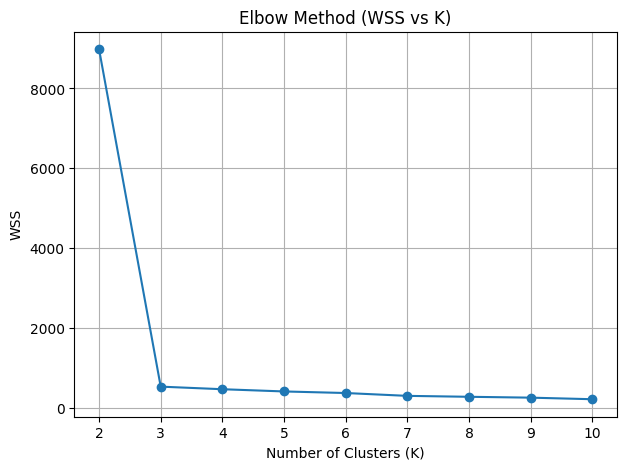

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(list(k_values), wss_values, marker="o")
plt.title("Elbow Method (WSS vs K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WSS")
plt.grid(True)
plt.show()


**8. Plot Silhouette Score Graph**

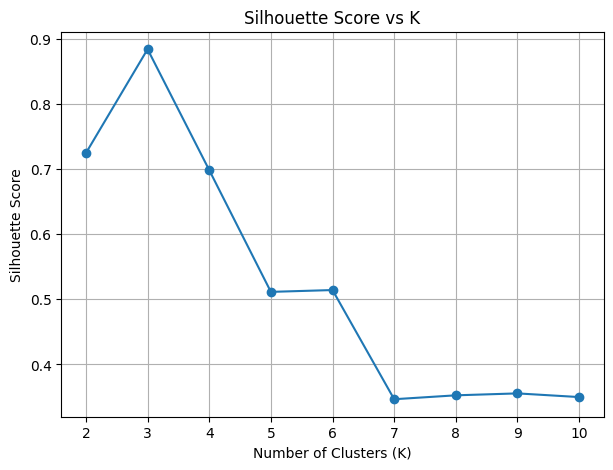

In [10]:
plt.figure(figsize=(7, 5))
plt.plot(list(k_values), silhouette_values, marker="o")
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


**9. Choose Best K and Plot Final Clusters**


Best K based on Silhouette Score: 3


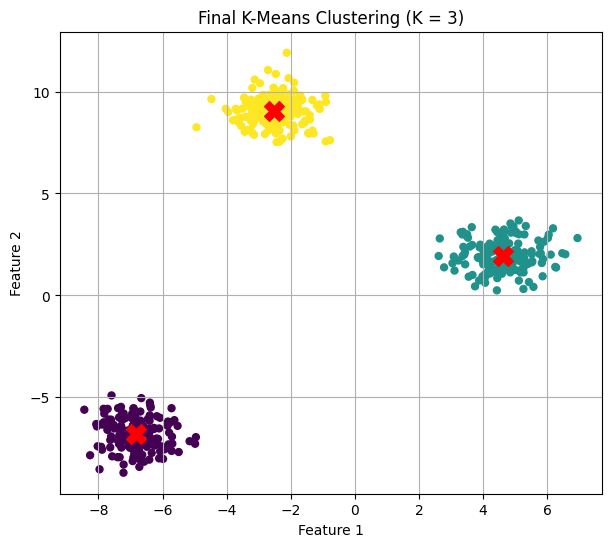

In [11]:
best_k = list(k_values)[np.argmax(silhouette_values)]
print("\nBest K based on Silhouette Score:", best_k)

final_labels, final_centroids = kmeans_scratch(X, best_k)

plt.figure(figsize=(7, 6))
plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap="viridis", s=25)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c="red", marker="X", s=200)
plt.title(f"Final K-Means Clustering (K = {best_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()